In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

from metatrader.services.backtester import Strategy

ModuleNotFoundError: No module named 'metatrader'

In [38]:
sql_connection = sqlite3.connect('../data/tickers_data.db')
df = pd.read_sql("select * from aapl", sql_connection)

In [39]:
df['all_time_high'] = df['close'].expanding().max()
df['drawdown'] = 1 - df['close'] / df['all_time_high']

In [40]:
df_melted = df.melt(id_vars=['time'], value_vars=['close', 'all_time_high'])


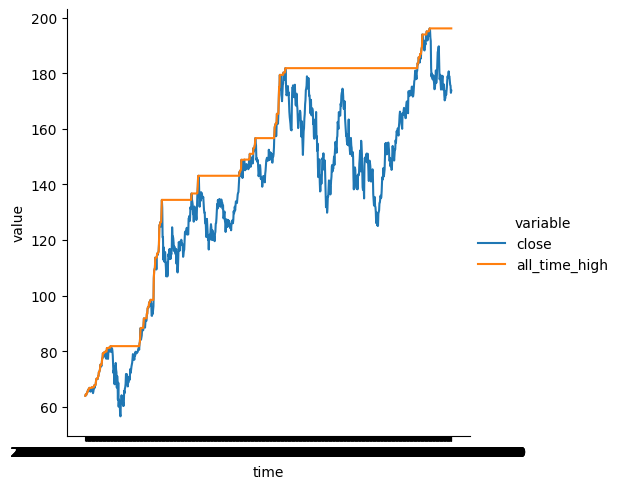

In [41]:
sns.relplot(data=df_melted, kind='line', x='time', y='value', hue='variable')

<Axes: xlabel='time', ylabel='drawdown'>

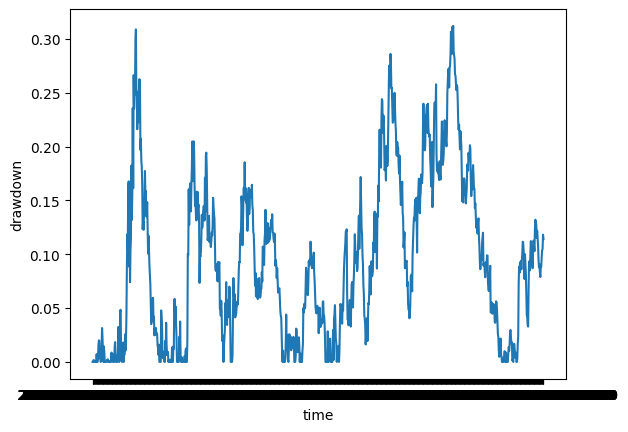

In [42]:
sns.lineplot(data=df, x='time', y='drawdown')

<Axes: xlabel='time', ylabel='drawdown'>

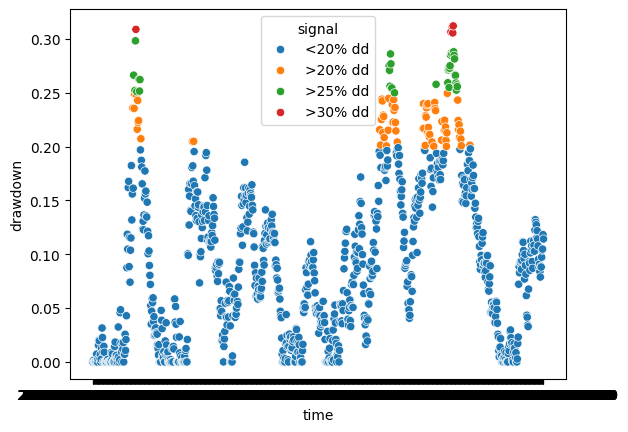

In [43]:
def get_signal(row):
    drawdown = row['drawdown']
    
    if drawdown >= 0.30:
        return '>30% dd'
    elif drawdown >= 0.25:
        return '>25% dd'
    elif drawdown >= 0.20:
        return '>20% dd'
    else:
        return '<20% dd'

df['signal'] = df.apply(get_signal, axis=1)

sns.scatterplot(data=df, x="time", y="drawdown", hue="signal")


In [44]:
buy_drawdown_strategy = Strategy(df, 10000, 1)
result = buy_drawdown_strategy.run()


display(result)

NameError: name 'Strategy' is not defined